<a href="https://colab.research.google.com/github/JuanFdoGf/PracticasDS/blob/main/Limite_Decisi%C3%B3n_Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lectura del conjunto de datos

In [1]:
from sklearn.datasets import load_iris

In [2]:
# Cargamos el conjunto de datos
iris_dataset = load_iris()

In [3]:
#   Visualizamos las etiquetas del conjuno de datos
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Leemos el conjunto de datos con la libreria Pandas
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
                  columns= iris_dataset['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Visualización del conjunto de datos

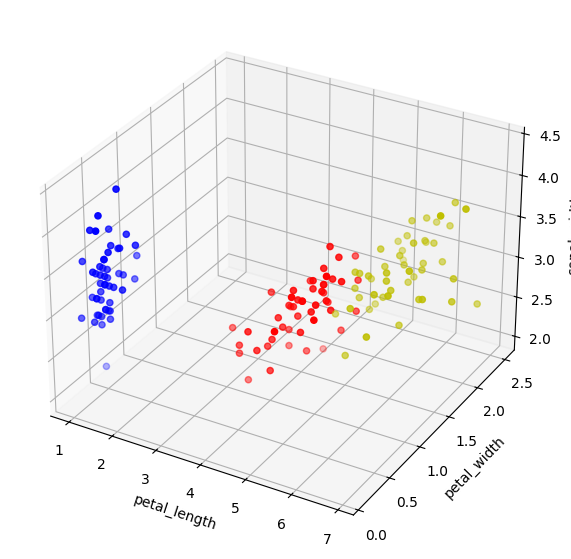

In [7]:
# Representación grafica de tres dimensiones del conjunto de datos
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')

ax.scatter3D(df['petal length (cm)'][df['target'] == 0],
             df['petal width (cm)'][df['target'] == 0],
             df['sepal width (cm)'][df['target'] == 0], c='b')

ax.scatter3D(df['petal length (cm)'][df['target'] == 1],
             df['petal width (cm)'][df['target'] == 1],
             df['sepal width (cm)'][df['target'] == 1], c='r')

ax.scatter3D(df['petal length (cm)'][df['target'] == 2],
             df['petal width (cm)'][df['target'] == 2],
             df['sepal width (cm)'][df['target'] == 2], c='y')

ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.set_zlabel('sepal_width')

plt.show()

In [8]:
# Reducimos el conjunto de datos para entrenar el algoritmo y visualizar el resultado
df_reduced = df[['petal length (cm)', 'petal width (cm)', 'target']]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [9]:
# Separamos las etiquetas de salida del resto de caracteristicas del conjunto de datos
X_df = df_reduced[['petal length (cm)', 'petal width (cm)']]
y_df = df_reduced['target']

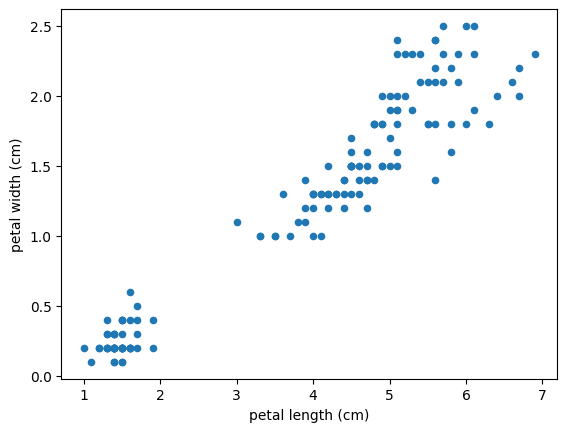

In [10]:
# Visualizamos el conjunto de datos de entrenamiento reducido
X_df.plot.scatter('petal length (cm)', 'petal width (cm)')
plt.show()

In [11]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_df, y_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [12]:
# Número de capas del perceptrón multicapa
clf.n_layers_

3

In [15]:
clf.hidden_layer_sizes

(100,)

In [13]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_

3

In [16]:
# Número de parámetros que forman el modelo
clf.coefs_[0].shape

(2, 100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


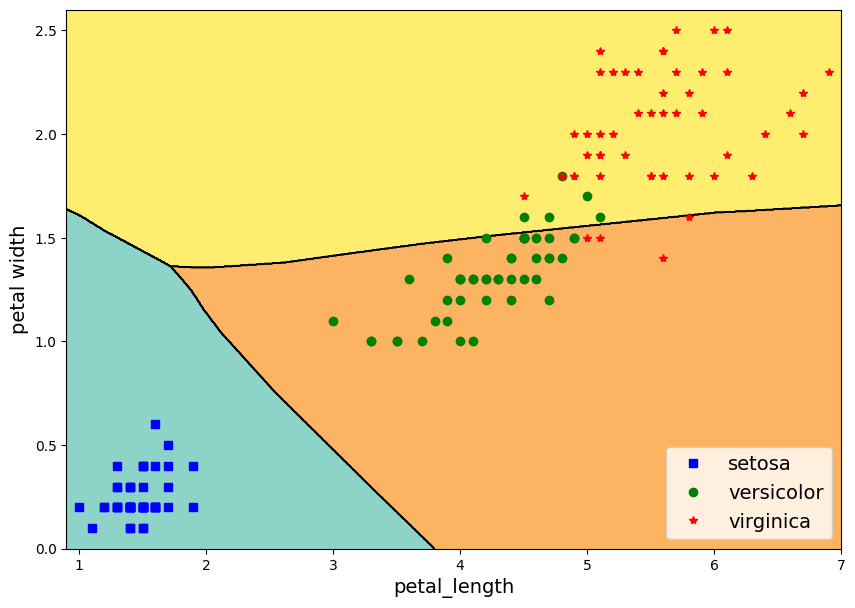

In [18]:
# Representación grafica del limite de decisión
import numpy as np

X = X_df.values

mins = X.min(axis=0) - 0.1
maxs = X.max(axis=0) + 0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                     np.linspace(mins[1], maxs[1], 1000))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 7))

plt.contourf(xx, yy, Z, cmap='Set3')
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')

plt.plot(X[:, 0][y_df==0], X[:, 1][y_df==0], 'bs', label='setosa')
plt.plot(X[:, 0][y_df==1], X[:, 1][y_df==1], 'go', label='versicolor')
plt.plot(X[:, 0][y_df==2], X[:, 1][y_df==2], 'r*', label='virginica')

plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)

plt.show()